<a href="https://colab.research.google.com/github/Sanju0392/Predicition-using-azure-databricks/blob/main/open_cv_san.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives of Project


The Objective of project involves-


1.Exploratory Data Analysis of MNIST

2.Data preprocessing

3.Building Deep learning model(ANN)

4.Evaluation of model

Build a ANN model on the Fashion mnist data set


Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.


Each example is a 28×28 grayscale image, associated with a label from 10 classes.


Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.


The original MNIST dataset is set of handwritten digits from 0–9,in grayscale with 28 x 28 pixel sizes.

In [1]:
#1)import neccesrary libraries
#2)creatingclasslabelarray
#3)using matplotlib plot all the images
#4)reshape image into single array
#5)give train and test labels
#6)predicting image class using ann
#7 

In [48]:
#import necessary libraries
import keras
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
import numpy as np

In [3]:
# Creating class label array
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#print the shape 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#60000 images of 28x28 grayscale

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
from matplotlib import pyplot as plt

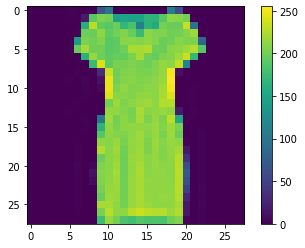

In [10]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

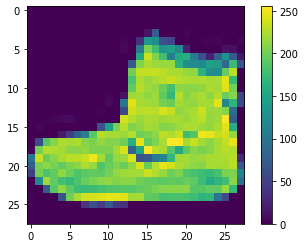

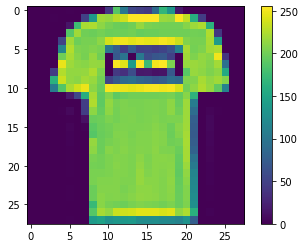

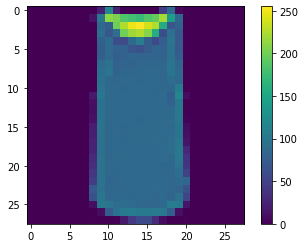

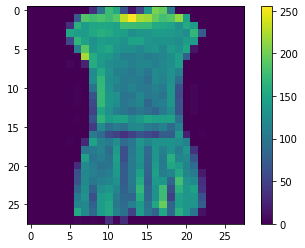

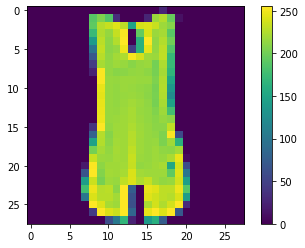

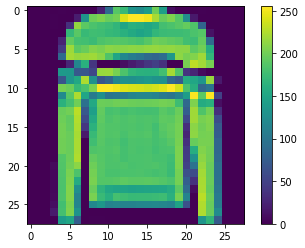

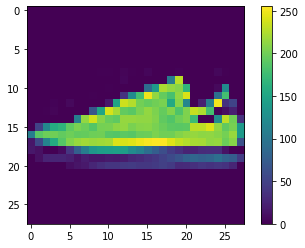

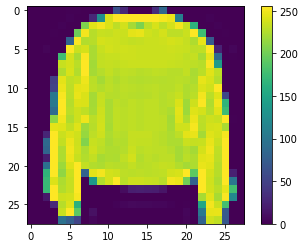

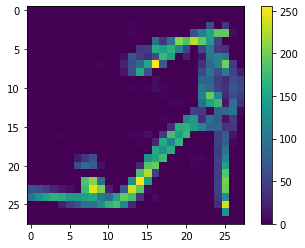

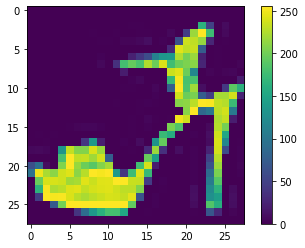

In [16]:
for i in range(10):
 plt.figure()
 plt.imshow(x_train[i])
 plt.colorbar()
 plt.grid(False)
 plt.show()

In [ ]:
# Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

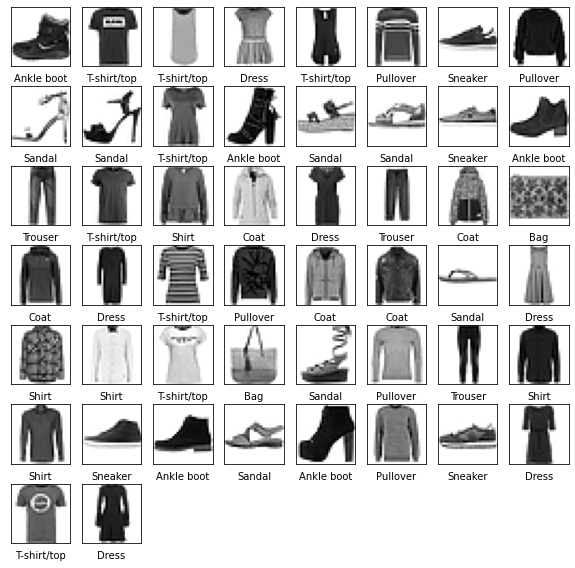

In [41]:
plt.figure(figsize=(10,10))
for i in range(50):
 plt.subplot(7,8,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False) 
 plt.imshow(x_train[i],cmap=plt.cm.binary)
 plt.xlabel(class_names[y_train[i]])

plt.show()

In [29]:
# reshape(-1,28*28 means )
# -1 indicates when I dont know howm many samples ,I have then by default take those many values 
x_train1 = x_train.reshape(-1,28*28)
x_test1 = x_test.reshape(-1,28*28)
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


In [30]:
np.unique(y_train)
# There are 10 labels starting from 0 to 9
print(f'Unique train labels: {np.unique(y_train)}')
print(f'Unique test labels: {np.unique(y_test)}')

Unique train labels: [0 1 2 3 4 5 6 7 8 9]
Unique test labels: [0 1 2 3 4 5 6 7 8 9]


Before proceeding there are few terms that you should be familiar with.


Epoch – The number of times the algorithm runs on the whole training dataset.


Sample – A single row of a dataset.


Batch – It denotes the number of samples to be taken to for updating the model parameters.


Learning rate – It is a parameter that provides the model a scale of how much model weights should be updated.


Cost Function/Loss Function – A cost function is used to calculate the cost that is the difference between the predicted value and the actual value.


Weights/ Bias– The learnable parameters in a model that controls the signal between two neurons.

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

ann = Sequential()
ann.add(Dense(1, activation='relu',input_dim=784))
ann.add(Dense(100, activation='relu'))
ann.add(Dense(10,activation='softmax'))
ann.summary()

#x1.........x784 + bias term only 1 bias 
#second layer from 1 node it is going 10 nodes to next layer then 10 weights + 10 bias = 20

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,995
Trainable params: 1,995
Non-trainable params: 0
_________________________________________________________________


In [33]:
ann.compile(optimizer='rmsprop',loss='categorical_crossentropy')
import tensorflow as tf
ann.fit(x_train1,tf.keras.utils.to_categorical(y_train),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1331
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9014
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9077
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8998
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9186
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9112
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8610
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7684
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7318
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7153


In [35]:
ann.predict(x_train1).shape

1875/1875 [==============================] - 4s 2ms/step


(60000, 10)

In [36]:
np.argmax(ann.predict(x_train1)[0])

1875/1875 [==============================] - 3s 1ms/step


7

In [37]:
import pandas as pd
trainpreds=np.argmax(ann.predict(x_train1),axis=1)
testpreds=np.argmax(ann.predict(x_test1),axis=1)

313/313 [==============================] - 0s 1ms/step


In [38]:
print("train accuracy",np.sum(y_train==trainpreds)/len(y_train))
print("test accuracy",np.sum(y_test==testpreds)/len(y_test))

train accuracy 0.2833833333333333
test accuracy 0.2848


Ann is weak in predicting image classification.now lets try with cnn

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()
# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))
# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D((2, 2)))
# Add a flattening layer
model.add(Flatten())
# Add a fully connected layer
model.add(Dense(64, activation='relu'))
# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

he output of each layer in the model, along with the number of parameters in each layer, are displayed in the model summary. Here's an explanation of how the output shapes and parameter counts are calculated for each layer:

conv2d layer: This layer has 32 filters of size 3x3, which are applied to the input image to produce 32 output feature maps. The output shape is (26, 26, 32), since each filter reduces the spatial dimensions of the input image by 2 pixels in both the height and width directions (due to the use of padding='valid'). The number of parameters in this layer is calculated as follows:

Each filter has 3x3=9 weights and a bias term, for a total of 10 parameters.
There are 32 filters in the layer, so the total number of parameters is 32x10=320.
max_pooling2d layer: This layer applies 2x2 max pooling to the output of the previous convolutional layer, reducing the spatial dimensions of the feature maps by a factor of 2. The output shape is (13, 13, 32), since each 2x2 window of the input is reduced to a single output value. There are no parameters in this layer, since it performs a fixed operation.

conv2d_1 layer: This layer has 64 filters of size 3x3, which are applied to the output of the previous max pooling layer to produce 64 output feature maps. The output shape is (11, 11, 64), following the same calculation as for the first convolutional layer. The number of parameters in this layer is calculated as follows:

Each filter has 3x3x32=288 weights and a bias term, for a total of 289 parameters.
There are 64 filters in the layer, so the total number of parameters is 64x289=18,496.
max_pooling2d_1 layer: This layer applies 2x2 max pooling to the output of the previous convolutional layer, reducing the spatial dimensions of the feature maps by a factor of 2. The output shape is (5, 5, 64), following the same calculation as for the first max pooling layer. There are no parameters in this layer.

flatten layer: This layer flattens the output of the previous max pooling layer into a 1D vector, which is then passed as input to the fully connected layers. The output shape is (1600), which is the product of the spatial dimensions (5x5x64) of the input feature maps.

dense_3 layer: This layer has 64 neurons and uses ReLU activation. It takes the flattened vector as input and produces an output of size (64). The number of parameters in this layer is calculated as follows:

Each neuron has 1600 weights (one for each input feature), plus a bias term, for a total of 1,601 parameters.
There are 64 neurons in the layer, so the total number of parameters is 64x1,601=102,464.
dense_4 layer: This layer has 10 neurons and uses softmax activation. It takes the output of the previous layer as input and produces an output of size (10). The number of parameters in this layer is calculated as follows:

Each neuron has 64 weights (one for each input feature), plus a bias term, for a total of 65 parameters.
There are 10 neurons in the layer, so the total number of parameters is 10x65

In [53]:
history = model.fit(x_train,tf.keras.utils.to_categorical(y_train), 
                    batch_size = 32,epochs = 20 ,validation_split =0.2)

Epoch 1/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.7250 - accuracy: 0.8032 - val_loss: 0.3952 - val_accuracy: 0.8560
Epoch 2/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3608 - accuracy: 0.8689 - val_loss: 0.3483 - val_accuracy: 0.8741
Epoch 3/20
1500/1500 [==============================] - 50s 34ms/step - loss: 0.3168 - accuracy: 0.8839 - val_loss: 0.3272 - val_accuracy: 0.8784
Epoch 4/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2905 - accuracy: 0.8913 - val_loss: 0.3504 - val_accuracy: 0.8779
Epoch 5/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2658 - accuracy: 0.9013 - val_loss: 0.3276 - val_accuracy: 0.8842
Epoch 6/20
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2494 - accuracy: 0.9073 - val_loss: 0.3171 - val_accuracy: 0.8863
Epoch 7/20
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2302 - accuracy: 0.9143 - val_loss: 0.3135 -

Define once again the same cnn model with cnn2 by changing the layers

first layer with 16 filters with 5x5 kernel size

second layer with 32 filters with 3x3 kernel size with maxpool

flatten layer

output layer and calculate the parameters

In [57]:
from keras.layers import Conv2D,MaxPool2D,Flatten

cnn2 = Sequential()
cnn2.add(Conv2D(filters=16,kernel_size=(5*5),strides=1,
                padding='same',activation='relu',
                input_shape=(28,28,1)))
cnn2.add(MaxPool2D(padding='same'))
cnn2.add(Conv2D(filters=32,kernel_size=(3*3),padding='same'))
cnn2.add(MaxPool2D(padding='same'))
cnn2.add(Flatten())
#cnn1.add(Dense(200,activation='relu'))
cnn2.add(Dense(10,activation='softmax'))
cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        10016     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        41504     
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                62730     
                                                                 
Total params: 114,250
Trainable params: 114,250
Non-trainable params: 0
________________________________________________

In [58]:
# Compile the model
cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = cnn2.fit(x_train,tf.keras.utils.to_categorical(y_train), 
                    batch_size = 32,epochs = 5 ,validation_split =0.2)

Epoch 1/5
1500/1500 [==============================] - 545s 363ms/step - loss: 0.7173 - accuracy: 0.7574 - val_loss: 0.7126 - val_accuracy: 0.7529
Epoch 2/5
1500/1500 [==============================] - 536s 357ms/step - loss: 0.6188 - accuracy: 0.7902 - val_loss: 0.5955 - val_accuracy: 0.7956
Epoch 3/5
1500/1500 [==============================] - 507s 338ms/step - loss: 0.6377 - accuracy: 0.7861 - val_loss: 0.6823 - val_accuracy: 0.7736
Epoch 4/5
1500/1500 [==============================] - 553s 369ms/step - loss: 0.6265 - accuracy: 0.7918 - val_loss: 0.5850 - val_accuracy: 0.8102
Epoch 5/5
1500/1500 [==============================] - 522s 348ms/step - loss: 0.6332 - accuracy: 0.7918 - val_loss: 0.7167 - val_accuracy: 0.7811
